In [ ]:
# 1. 데이터 확인
# 2. 4분위수 확인
# 3. 결측치 검사
# 4. 평균, 중앙, 최빈
# 5. 결측치 대체

In [4]:
# 1. 데이터 확인
import pandas as pd

happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(happiness_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [4]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [5]:
print(happiness_df.columns)

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')


In [7]:
#2. 4분위수 확인
display(happiness_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [31]:
# 1인당 GDP에 따른 삶의 자율도 변화

In [141]:
data = happiness_df[['gdp_per_capita','freedom_to_make_life_choices']]
display(data)

,gdp_per_capita,freedom_to_make_life_choices
0,1.888,0.772
1,1.949,0.734
2,1.926,0.738
3,1.833,0.569
4,1.942,0.672
...,...,...
132,0.531,0.375
133,0.758,0.363
134,0.670,0.371
135,1.417,0.123


In [28]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
gdp_per_capita,137.0,1.406985,0.432963,0.0,1.099,1.449,1.798,2.200
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.0,0.455,0.557,0.656,0.772


In [45]:
# 주요분석대상인 freedom_to_make_life_choices 와 gdp_per_capita의 이상치 확인하고 정상치 범위 찾기

In [142]:
# gdp_per_capita
import numpy as np
from scipy.stats import iqr

gdp_Q1 = data.describe().T.loc['gdp_per_capita', '25%']
gdp_Q3 = data.describe().T.loc['gdp_per_capita', '75%']
print(gdp_Q1, gdp_Q3)

iqr_value = iqr(data.gdp_per_capita)
print(iqr_value)

lower_bound = gdp_Q1 - 1.5 * iqr_value
upper_bound = gdp_Q3 + 1.5 * iqr_value
print("=" * 60)
print(f'gdp_per_capita 정상치 범위: {lower_bound} ~ {upper_bound}')
print("=" * 60)

1.099 1.798
0.6990000000000001
gdp_per_capita 정상치 범위: 0.05049999999999977 ~ 2.8465000000000003


In [143]:
# 이상치 확인
data[(data['gdp_per_capita'] < lower_bound) | (data['gdp_per_capita'] > upper_bound)].count()

gdp_per_capita                  1
freedom_to_make_life_choices    1
dtype: int64

In [144]:
# 이상치 제거
data = data[~(data['gdp_per_capita'] < lower_bound) | (data['gdp_per_capita'] > upper_bound)]
gdp_df[(data['gdp_per_capita'] < lower_bound) | (data['gdp_per_capita'] > upper_bound)].count()

gdp_per_capita                  0
freedom_to_make_life_choices    0
dtype: int64

In [145]:
data

,gdp_per_capita,freedom_to_make_life_choices
0,1.888,0.772
1,1.949,0.734
2,1.926,0.738
3,1.833,0.569
4,1.942,0.672
...,...,...
132,0.531,0.375
133,0.758,0.363
134,0.670,0.371
135,1.417,0.123


In [146]:
# freedom_to_make_life_choices
import numpy as np
from scipy.stats import iqr

freedom_Q1 = data.describe().T.loc['freedom_to_make_life_choices', '25%']
freedom_Q3 = data.describe().T.loc['freedom_to_make_life_choices', '75%']
print(freedom_Q1, freedom_Q3)

iqr_value = iqr(data.freedom_to_make_life_choices)
print(iqr_value)

lower_bound = freedom_Q1 - 1.5 * iqr_value
upper_bound = freedom_Q3 + 1.5 * iqr_value
print("=" * 60)
print(f'freedom_to_make_life_choices의 정상치 범위: {lower_bound} ~ {upper_bound}')
print("=" * 60)

0.45875 0.6567500000000001
0.19800000000000006
freedom_to_make_life_choices의 정상치 범위: 0.1617499999999999 ~ 0.9537500000000001


In [147]:
# 이상치 확인(개수)
data[(data['freedom_to_make_life_choices'] < lower_bound) | (data['freedom_to_make_life_choices'] > upper_bound)].count()

gdp_per_capita                  4
freedom_to_make_life_choices    4
dtype: int64

In [149]:
# 이상치 제거
data = data[~(data['freedom_to_make_life_choices'] < lower_bound) | (data['freedom_to_make_life_choices'] > upper_bound)]
freedom_df[(data['freedom_to_make_life_choices'] < lower_bound) | (data['freedom_to_make_life_choices'] > upper_bound)].count()

gdp_per_capita                  0
freedom_to_make_life_choices    0
dtype: int64

In [150]:
data

,gdp_per_capita,freedom_to_make_life_choices
0,1.888,0.772
1,1.949,0.734
2,1.926,0.738
3,1.833,0.569
4,1.942,0.672
...,...,...
130,0.637,0.490
131,1.471,0.480
132,0.531,0.375
133,0.758,0.363


In [151]:
# 3. 결측치 검사
print(data.isna())
print(data.isna().sum())

     gdp_per_capita  freedom_to_make_life_choices
0             False                         False
1             False                         False
2             False                         False
3             False                         False
4             False                         False
..              ...                           ...
130           False                         False
131           False                         False
132           False                         False
133           False                         False
134           False                         False

[132 rows x 2 columns]
gdp_per_capita                  0
freedom_to_make_life_choices    0
dtype: int64


In [155]:
data.count()

gdp_per_capita                  132
freedom_to_make_life_choices    132
dtype: int64

In [156]:
#gdp에 따른 free 평균값
gdp_mean_df = data.groupby('gdp_per_capita').mean('freedom_to_make_life_choices').reset_index()
display(gdp_mean_df)

#free에 따른 gdp 평균값
free_mean_df = data.groupby('freedom_to_make_life_choices').mean('gdp_per_capita').reset_index()
display(free_mean_df)

,gdp_per_capita,freedom_to_make_life_choices
0,0.531,0.375
1,0.561,0.540
2,0.570,0.625
3,0.622,0.393
4,0.628,0.471
...,...,...
126,2.015,0.745
127,2.022,0.678
128,2.152,0.656
129,2.168,0.660


,freedom_to_make_life_choices,gdp_per_capita
0,0.187,0.632
1,0.248,1.708
2,0.252,1.353
3,0.259,1.333
4,0.281,1.465
...,...,...
107,0.748,1.883
108,0.752,1.994
109,0.754,1.921
110,0.768,1.025


In [157]:
#gdp에 따른 free 최소값
gdp_min_df = data.groupby('gdp_per_capita').min('freedom_to_make_life_choices').reset_index()
display(gdp_min_df)

#free에 따른 gdp 최소값
free_min_df = data.groupby('freedom_to_make_life_choices').min('gdp_per_capita').reset_index()
display(free_min_df)

,gdp_per_capita,freedom_to_make_life_choices
0,0.531,0.375
1,0.561,0.540
2,0.570,0.625
3,0.622,0.393
4,0.628,0.471
...,...,...
126,2.015,0.745
127,2.022,0.678
128,2.152,0.656
129,2.168,0.660


,freedom_to_make_life_choices,gdp_per_capita
0,0.187,0.632
1,0.248,1.708
2,0.252,1.353
3,0.259,1.333
4,0.281,1.465
...,...,...
107,0.748,1.883
108,0.752,1.994
109,0.754,1.921
110,0.768,1.025


In [158]:
#gdp에 따른 free 최대값
gdp_max_df = data.groupby('gdp_per_capita').max('freedom_to_make_life_choices').reset_index()
display(gdp_max_df)

#free에 따른 gdp 최대값
free_max_df = data.groupby('freedom_to_make_life_choices').max('gdp_per_capita').reset_index()
display(free_max_df)

,gdp_per_capita,freedom_to_make_life_choices
0,0.531,0.375
1,0.561,0.540
2,0.570,0.625
3,0.622,0.393
4,0.628,0.471
...,...,...
126,2.015,0.745
127,2.022,0.678
128,2.152,0.656
129,2.168,0.660


,freedom_to_make_life_choices,gdp_per_capita
0,0.187,0.632
1,0.248,1.708
2,0.252,1.353
3,0.259,1.333
4,0.281,1.465
...,...,...
107,0.748,1.883
108,0.752,1.994
109,0.754,1.921
110,0.768,1.025


In [159]:
#gdp에 따른 free 표준편차
gdp_std_df = happiness_df.groupby('gdp_per_capita')['freedom_to_make_life_choices'].std().reset_index()
display(gdp_std_df)

#free에 따른 gdp 표준편차
free_std_df = happiness_df.groupby('freedom_to_make_life_choices')['gdp_per_capita'].std().reset_index()
display(free_std_df)

,gdp_per_capita,freedom_to_make_life_choices
0,0.000,NaN
1,0.531,NaN
2,0.561,NaN
3,0.570,NaN
4,0.622,NaN
...,...,...
128,2.015,NaN
129,2.022,NaN
130,2.152,NaN
131,2.168,NaN


,freedom_to_make_life_choices,gdp_per_capita
0,0.000,NaN
1,0.117,NaN
2,0.123,NaN
3,0.125,NaN
4,0.187,NaN
...,...,...
111,0.748,NaN
112,0.752,NaN
113,0.754,NaN
114,0.768,NaN


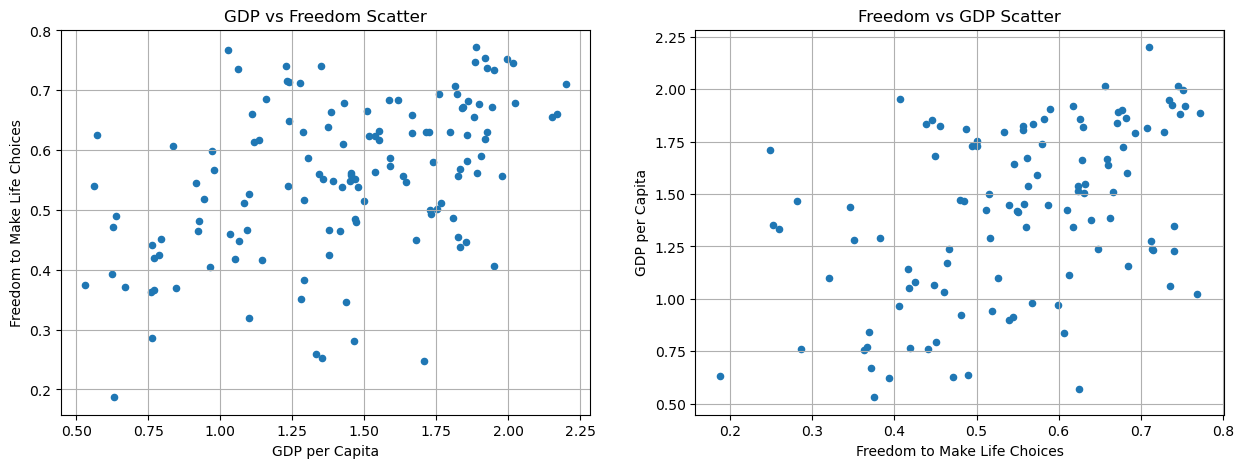

In [160]:
# 1인당 국내 총 생산의 상승에 따른 삶의 자율도 평균값
# 삶의 자율도가 높을수록 1인당 국내 총 생산의 평균값
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

gdp_mean_df.plot(title='GDP vs Freedom Scatter', x='gdp_per_capita', y='freedom_to_make_life_choices', kind='scatter', grid=True, ax=axes[0], xlabel="GDP per Capita", ylabel="Freedom to Make Life Choices")
free_mean_df.plot(title='Freedom vs GDP Scatter', x='freedom_to_make_life_choices', y='gdp_per_capita', kind='scatter', grid=True, ax=axes[1], xlabel="Freedom to Make Life Choices", ylabel="GDP per Capita")

plt.show()

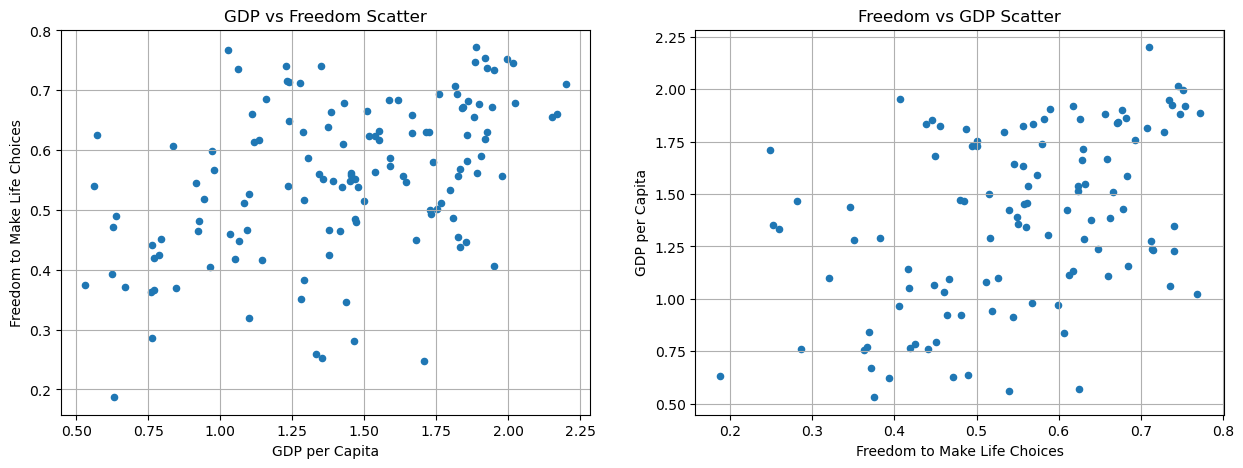

In [161]:
# 최소값 비교
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

gdp_min_df.plot(title='GDP vs Freedom Scatter', x='gdp_per_capita', y='freedom_to_make_life_choices', kind='scatter', grid=True, ax=axes[0], xlabel="GDP per Capita", ylabel="Freedom to Make Life Choices")
free_min_df.plot(title='Freedom vs GDP Scatter', x='freedom_to_make_life_choices', y='gdp_per_capita', kind='scatter', grid=True, ax=axes[1], xlabel="Freedom to Make Life Choices", ylabel="GDP per Capita")

plt.show()

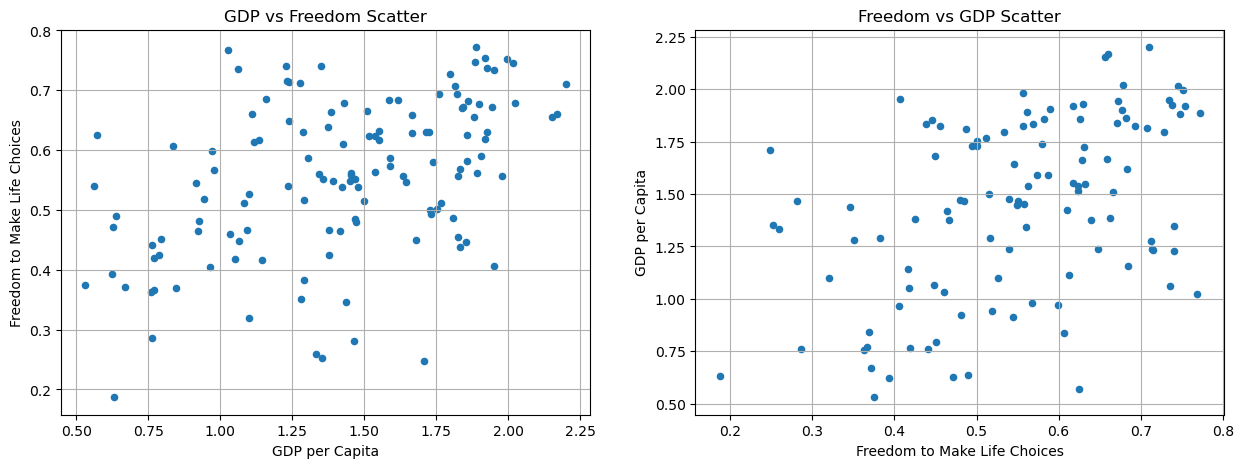

In [162]:
# 최대값 비교
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

gdp_max_df.plot(title='GDP vs Freedom Scatter', x='gdp_per_capita', y='freedom_to_make_life_choices', kind='scatter', grid=True, ax=axes[0], xlabel="GDP per Capita", ylabel="Freedom to Make Life Choices")
free_max_df.plot(title='Freedom vs GDP Scatter', x='freedom_to_make_life_choices', y='gdp_per_capita', kind='scatter', grid=True, ax=axes[1], xlabel="Freedom to Make Life Choices", ylabel="GDP per Capita")

plt.show()

#### 2023년 1인당 국내총생산(GDP)와 삶의 자율도의 상관관계
- 1인당 국내총생산(GDP)과 삶의 자율도의 두 변수를 각각 독립변수와 종속변수로 두고 상관관계를 분석해보고자 했다.
- 평균값, 최소값, 최대값을 비교해보았을 때 각 변수의 상승률에 따라 다른 종속변수가 높을 확률이 있지만
  두 개의 변수만으로는 서로 상관관계가 있다고 분석하기 어려웠다.

📌 결론
- 따라서, 경제적인 요소가 삶의 자율도를 정하는데 여러 요소중 하나로 작용할 수는 있지만, 대표적인 변수로 보기는 어렵다.
- 한가지 요소가 변화하는데에는 여러 요소가 상호작용 하기 때문에 여러 변수를 대상으로 더 넓은 분석이 필요하다.